<div>
<img src="movies.jpg" width="700">
</div>

<h1><center>What Makes Movies Earn More Money?</center></h1>
<center><b>Stephanie Qie & Nikhil Pateel</b></center>
_______________________________________________________________________________________________________________________________

# Introduction
Movies play an important role in today's popular culture and media, as they are one of the largest forms of entertainment and one of the most profitable industries in our society.

From large movie studios to movie analysts, many people have tried to analyze what makes a given movie earn more money.

In this tutorial, we shall find a few of the most important features of movies, and use those features to predict how much money a movie will make. We will first collect our data, tidy it, explore possible trends, then perform an analysis and make prediction models. And not only will we see that there are some features that are very strong predictors of movie success, but a simple linear model can outperform machine learning algorithms like random forests.

# 0: Required libraries

We will be using the following libraries
+ `pandas` - For storing data
+ `numpy` - For manipulating data
+ `re` - For regex string processing
+ `numpy` - For data tidying
+ `matplotlib` - For plotting data
+ `sklearn` - For data analysis
+ `scipy` - For data analysis test
+ `warnings` - For warnings

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats
import warnings

# 1: Data collecting and tidying

To begin the first part of the data science lifecycle, we shall start by using a Kaggle dataset found below, and then cleaning up some of the data it was in. Since this was a prepared dataset, it would seem like we'd have little work to do, but there were a few quirks to this dataset which required some work. We shall describe below.

## 1.0: Dataset source

We will be using data from Kaggle, which is one of the most popular online sources for datasets for data science and machine learning.
+ [Kaggle: TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

## 1.1: Grabbing data

Load the .csv files which we downloaded from kaggle, and display the first few rows to have a general understanding of the data.

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
cast = pd.read_csv('tmdb_5000_credits.csv')

display(df.head())
display(cast.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## 1.2: Tidying data

Join the two tables by movie title, so that all of the data is in one table.

In [3]:
df = df.set_index('original_title').join(cast.set_index('title'))
df = df.reset_index()
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...",...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,$upercapitalist,0,"[{""id"": 53, ""name"": ""Thriller""}]",http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,(500) Days of Summer,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...",...,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
3,...E tu vivrai nel terrore! L'aldilà,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,"[{""name"": ""Fulvia Film"", ""id"": 13682}]",...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,NaN
4,10 Cloverfield Lane,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."


As seen in the table above, some of the columns (ie. genres, production companies, production countries, spoken languages, cast, and crew) have more than one element per cell. We will be converting those cells into data structures to make it easier to access all of the data in those cells.

First we will modify the genres. As shown below, each movie can have multiple genres, and each genre contains an `id` and `name`. We will make it so that for each movie, all of their genres are stored in an array, and each genre element will be a dictionary with keys for its id and name.

In [4]:
df.iloc[0]["genres"]

'[{"id": 18, "name": "Drama"}, {"id": 9648, "name": "Mystery"}, {"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]'

In [5]:
#go through each row
for index, row in df.iterrows():
    
    genres = []
    line = row["genres"]
    cur_genres = line.split('},')
    
    del cur_genres[-1]
  
    #transform info for each genre
    for genre in cur_genres:
        m = re.search("(\d+), \"name\": \"(\w+)", genre)
        cur_id = m.groups()[0]
        cur_name = m.groups()[1]
        
        cur_info = {}
        cur_info["id"] = cur_id
        cur_info["name"] = cur_name
        
        genres.append(cur_info)
        
    df.at[index, "genres"] = genres

Next we will modify the production companies. Each movie can have multiple production companies, and each production company has a `name` and `id`. We will make it so that for each movie, all of their production companies are stored in an array, and each production company element will be a dictionary with keys for its name and id.

In [6]:
df.iloc[0]["production_companies"]

'[{"name": "AST Studios", "id": 75277}, {"name": "Lowland Pictures", "id": 75278}]'

In [7]:
#go through each row
for index, row in df.iterrows():
    
    p_comps = []
    line = row["production_companies"]
    cur_p_comps = line.split('},')
    
    del cur_p_comps[-1]
  
    #transform info for each genre
    for p_comp in cur_p_comps:
        m = re.search("name\": \"(.+)\", \"id\": (\d+)", p_comp)
        cur_name = m.groups()[0]
        cur_id = m.groups()[1]
        
        cur_info = {}
        cur_info["name"] = cur_name
        cur_info["id"] = cur_id
        
        p_comps.append(cur_info)
        
    df.at[index, "production_companies"] = p_comps

Now we will modify the production countries. Each movie can have multiple production countries, and each production country has an `iso_3166_1` and a `name`.

In [8]:
df.iloc[0]["production_countries"]

'[{"iso_3166_1": "US", "name": "United States of America"}]'

In [9]:
#go through each row
for index, row in df.iterrows():
    
    p_countries = []
    line = row["production_countries"]
    cur_p_countries = line.split('},')
    
    del cur_p_countries[-1]
  
    #transform info for each genre
    for p_country in cur_p_countries:
        m = re.search("\"iso_3166_1\": \"(.+)\", \"name\": \"(.+)\"", p_country)
        cur_iso_3166_1 = m.groups()[0]
        cur_name = m.groups()[1]
        
        cur_info = {}
        cur_info["iso_3166_1"] = cur_iso_3166_1
        cur_info["name"] = cur_name
        
        p_countries.append(cur_info)
        
    df.at[index, "production_countries"] = p_countries

After this, we will modify the spoken languages. Each movie can have multiple spoken languages, and each spoken language has an `iso_639_1` and a `name`.

In [10]:
df.iloc[0]["spoken_languages"]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [11]:
#go through each row
for index, row in df.iterrows():
    
    s_langs = []
    line = row["spoken_languages"]
    cur_s_langs = line.split('},')
    
    del cur_s_langs[-1]
  
    #transform info for each genre
    for s_lang in cur_s_langs:
        
        m = re.search("\"iso_639_1\": \"(.*)\", \"name\": \"(.*)\"", s_lang)
        
        cur_iso_639_1 = m.groups()[0]
        cur_name = m.groups()[1]

        cur_info = {}
        cur_info["iso_639_1"] = cur_iso_639_1
        cur_info["name"] = cur_name

        s_langs.append(cur_info)
        
    df.at[index, "spoken_languages"] = s_langs
    
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{'id': '18', 'name': 'Drama'}, {'id': '9648',...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{'name': 'AST Studios', 'id': '75277'}]",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de..."
1,$upercapitalist,0,[],http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,[],Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,NaN
2,(500) Days of Summer,7500000,"[{'id': '35', 'name': 'Comedy'}, {'id': '18', ...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{'name': 'Fox Searchlight Pictures', 'id': '4...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de..."
3,...E tu vivrai nel terrore! L'aldilà,0,[],NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,[],...,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,NaN
4,10 Cloverfield Lane,15000000,"[{'id': '53', 'name': 'Thriller'}, {'id': '878...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{'name': 'Paramount Pictures', 'id': '4'}, {'...",...,103.0,[],Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de..."


Subsequently, we will modify the cast. Each movie has multiple cast members, and each member has a `cast_id`, a `character`, a `credit_id`, a `gender`, an `id`, a `name`, and an `order`. We will convert this string into an array of hashes.

In [12]:
df.iloc[0]["cast"]

'[{"cast_id": 0, "character": "Alex\'s 12-Step Friend", "credit_id": "545bba84c3a3685358001b80", "gender": 1, "id": 343, "name": "Taryn Manning", "order": 1}, {"cast_id": 1, "character": "Sam\'s Mom", "credit_id": "545bba8a0e0a261fad0023f6", "gender": 1, "id": 10871, "name": "Natasha Lyonne", "order": 2}, {"cast_id": 2, "character": "Alex Cox", "credit_id": "545bba8fc3a36853500018a4", "gender": 1, "id": 2838, "name": "Chlo\\u00eb Sevigny", "order": 3}, {"cast_id": 3, "character": "Mr. Cox", "credit_id": "545bba94c3a3685353001a56", "gender": 2, "id": 9296, "name": "Balthazar Getty", "order": 4}, {"cast_id": 4, "character": "Dr. White", "credit_id": "545bba990e0a261fb900220b", "gender": 2, "id": 16327, "name": "Timothy Hutton", "order": 5}, {"cast_id": 5, "character": "Lisa", "credit_id": "545bba9ec3a368535d001e67", "gender": 1, "id": 210573, "name": "Lydia Hearst", "order": 6}, {"cast_id": 6, "character": "Mom", "credit_id": "545bbaa4c3a368535d001e6b", "gender": 0, "id": 180425, "name":

In [13]:
#go through each row
for index, row in df.iterrows():
    
    casts = []
    line = str(row["cast"])
    cur_casts = line.split('},')
    
    del cur_casts[-1]
  
    #transform info for each genre
    for cast in cur_casts:
       
        m = re.search("cast_id\": (\d*), \"character\": \"(.*)\", \"credit_id\": \"(.*)\", \"gender\": (.*), \"id\": (\d*), \"name\": \"(.*)\", \"order\": (.*)", cast)
       
        cur_cast_id = m.groups()[0]
        cur_character = m.groups()[1]
        cur_credit_id = m.groups()[2]
        cur_gender = m.groups()[3]
        cur_id = m.groups()[4]
        cur_name = m.groups()[5]
        cur_order = m.groups()[6]

        cur_info = {}
        cur_info["cast_id"] = cur_cast_id
        cur_info["character"] = cur_character
        cur_info["credit_id"] = cur_credit_id
        cur_info["gender"] = cur_gender
        cur_info["id"] = cur_id
        cur_info["name"] = cur_name
        cur_info["order"] = cur_order

        casts.append(cur_info)
        
    df.at[index, "production_countries"] = casts

Lastly, we will modify the crew. Crews can have multiple members, and each member has a `credit_id`, a `department`, a `gender`, an `id`, a `job`, and a `name`.

In [14]:
df.iloc[0]["crew"]

'[{"credit_id": "545bbac70e0a261fb6002329", "department": "Writing", "gender": 1, "id": 61111, "job": "Screenplay", "name": "Tara Subkoff"}, {"credit_id": "545bbabf0e0a261fb9002212", "department": "Directing", "gender": 1, "id": 61111, "job": "Director", "name": "Tara Subkoff"}, {"credit_id": "545bbae4c3a36853500018a8", "department": "Production", "gender": 1, "id": 61111, "job": "Producer", "name": "Tara Subkoff"}, {"credit_id": "545bbad3c3a3685358001b92", "department": "Production", "gender": 0, "id": 1382445, "job": "Producer", "name": "Jason Ludman"}, {"credit_id": "545bbadbc3a368535d001e74", "department": "Production", "gender": 0, "id": 1382446, "job": "Producer", "name": "Oren Segal"}, {"credit_id": "545bbaf3c3a3685358001b9d", "department": "Production", "gender": 0, "id": 1382448, "job": "Producer", "name": "Brendan Walsh"}]'

In [15]:
#go through each row
for index, row in df.iterrows():
    
    crews = []
    line = str(row["crew"])
    cur_crews = line.split('},')
    
    del cur_crews[-1]
   
    #transform info for each genre
    for crew in cur_crews:
        
        m = re.search("credit_id\": (.*), \"department\": \"(.*)\", \"gender\": (.*), \"id\": (.*), \"job\": (.*), \"name\": (.*)\"", crew)
       
        cur_credit_id = m.groups()[0]
        cur_department = m.groups()[1]
        cur_gender = m.groups()[2]
        cur_id = m.groups()[3]
        cur_job = m.groups()[4]
        cur_name = m.groups()[5]

        cur_info = {}
        cur_info["credit_id"] = cur_credit_id
        cur_info["department"] = cur_department
        cur_info["gender"] = cur_gender
        cur_info["id"] = cur_id
        cur_info["job"] = cur_job
        cur_info["name"] = cur_name

        crews.append(cur_info)
        
    df.at[index, "crew"] = crews

The final tidied table is shown below. Now we will being doing exploratory analysis on our data.

In [16]:
display(df.head())

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,#Horror,1500000,"[{'id': '18', 'name': 'Drama'}, {'id': '9648',...",http://www.hashtaghorror.com/,301325,[],de,"Inspired by actual events, a group of 12 year ...",2.815228,"[{'name': 'AST Studios', 'id': '75277'}]",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Death is trending.,#Horror,3.3,52,301325.0,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{'credit_id': '""545bbac70e0a261fb6002329""', '..."
1,$upercapitalist,0,[],http://supercapitalist.net/,119458,[],en,A maverick New York hedge fund trader with unc...,0.174311,[],...,103.0,[],Released,Money for Life,Supercapitalist,3.5,2,NaN,NaN,[]
2,(500) Days of Summer,7500000,"[{'id': '35', 'name': 'Comedy'}, {'id': '18', ...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"[{'name': 'Fox Searchlight Pictures', 'id': '4...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It was almost like falling in love.,(500) Days of Summer,7.2,2904,19913.0,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{'credit_id': '""52fe47f99251416c750abaa5""', '..."
3,...E tu vivrai nel terrore! L'aldilà,0,[],NaN,19204,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 1706, ""n...",it,A young woman inherits an old hotel in Louisia...,8.022122,[],...,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The seven dreaded gateways to Hell are conceal...,The Beyond,6.6,117,NaN,NaN,[]
4,10 Cloverfield Lane,15000000,"[{'id': '53', 'name': 'Thriller'}, {'id': '878...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,"After a car accident, Michelle awakens to find...",53.698683,"[{'name': 'Paramount Pictures', 'id': '4'}, {'...",...,103.0,[],Released,Monsters come in many forms.,10 Cloverfield Lane,6.8,2468,333371.0,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{'credit_id': '""57627624c3a3680682000872""', '..."


# 2.0: Exploratory data analysis

## 2.1: Overall trends

To start off our data exploration, we will create a correlation table to view the general trends and relationships within our data. 

We will only be using the key variables in our table, and we will also include a variable for missing data.

In [17]:
df['missing'] = 0

genres = []
revenues = []

#get the genre and revenue data from the table
for index, row in df.iterrows():
    l = list(map(lambda e: e['name'], row['genres']))
    genres += l;
    revenues += [row['revenue']] * len(row['genres'])

#find the missing data in the table    
for index, row in df.iterrows():
    
    missing = 0
    
    #if the budget is missing
    if row['budget'] == 0:
        missing += 1
        
    #if the genres are missing    
    if row['genres'] == []:
        missing += 1
        
    #if the homepage is missing    
    if row['homepage'] == np.NaN:
        missing += 1
        
    #if the keywords are missing    
    if row['keywords'] == []:
        missing += 1
        
    #if the production companies are missing    
    if row['production_companies'] == []:
        missing += 1
        
    #if the production countries are missing    
    if row['production_countries'] == []:
        missing += 1
        
    #if the spoken languages are missing    
    if row['spoken_languages'] == []:
        missing += 1
        
    #if the revenue is missing    
    if row['revenue'] == 0:
        missing += 1 
        
    #if the tagline is missing    
    if row['tagline'] == np.NaN:
        missing += 1
        
    #if the cast info is missing    
    if row['cast'] == np.NaN:
        missing += 1
        
    #if the crew info is missing    
    if row['crew'] == np.NaN:
        missing += 1
    
    df.at[index, 'missing'] = missing

In [18]:
display(df.corr())

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,missing
budget,1.000000,-0.089163,0.505545,0.730603,0.269966,0.093112,0.593224,-0.086309,-0.422248
id,-0.089163,1.000000,0.031267,-0.050527,-0.153521,-0.270644,-0.004113,0.999903,0.241596
popularity,0.505545,0.031267,1.000000,0.644725,0.225761,0.273952,0.778214,0.044541,-0.331544
revenue,0.730603,-0.050527,0.644725,1.000000,0.251344,0.197337,0.781471,-0.046466,-0.324332
runtime,0.269966,-0.153521,0.225761,0.251344,1.000000,0.375036,0.272258,-0.157726,-0.291237
vote_average,0.093112,-0.270644,0.273952,0.197337,0.375036,1.000000,0.313024,-0.267474,-0.290222
vote_count,0.593224,-0.004113,0.778214,0.781471,0.272258,0.313024,1.000000,0.005814,-0.328812
movie_id,-0.086309,0.999903,0.044541,-0.046466,-0.157726,-0.267474,0.005814,1.000000,0.239065
missing,-0.422248,0.241596,-0.331544,-0.324332,-0.291237,-0.290222,-0.328812,0.239065,1.000000


From the correlation table, it is clear that there are noticeable relationships between several of the variables, such as one  between revenue and budget. It is also interesting to note how there appears to be a relationship between revenue and missing data, as it appears that if a movie earns more money, it is less likely to have missing data in the table. This implies that our missing data is likely missing not at random (MNAR). For now, we'll deal with the data by just dropping missing data from our analysis, but we'd really want to impute them in the future.

We will explore these relationships below, excluding the relationships that are inconsequential such as the correlation between revenue and runtime or id.

First, we start by replacing any zero values in the budget and revenue columns to nans to avoid having the 0s influencing our regression. In the future, we can also impute the nans in some order.

In [19]:
columns = ['budget', 'revenue']
df[columns] = df[columns].replace(0, np.nan)

## 2.2: Two variable relationships

### 2.2.1: Budget/Revenue relationship

Now we will explore the relationship between revenue and budget.

Before we start our data exploration, we will turn off warnings for plots, as they do not affect our results.

In [20]:
warnings.filterwarnings('ignore')

We will begin by creating a histogram of the movies' revenues on a log scaling.

Text(0.5, 1.0, 'Distribution of Revenue')

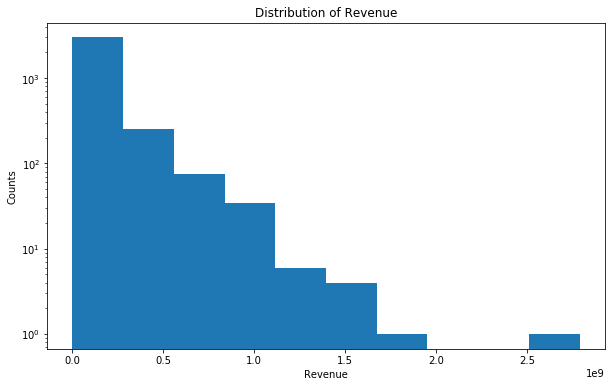

In [21]:
plt.figure(figsize=(10,6))
display()
n, bins, patches = plt.hist(df['revenue'], log=True)

plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Distribution of Revenue')

As shown in the histogram, the majority of movies have low revenues, and only a few have high revenues.

Now we will create a histogram for the movies' budgets, again on a log scale.

Text(0.5, 1.0, 'Distribution of Budget')

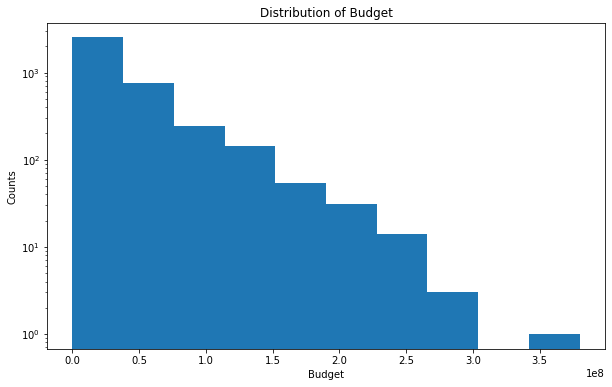

In [22]:
plt.figure(figsize=(10,6))
display()
n, bins, patches = plt.hist(df['budget'], log=True)
plt.xlabel('Budget')
plt.ylabel('Counts')
plt.title('Distribution of Budget')

Just like the revenues, most of the movies have low budgets. As shown in the histogram, as the budget increases, there are fewer movies.

Now we will create a histogram that shows the counts for both revenue and budget to compare them to analyze their similarities and differences.

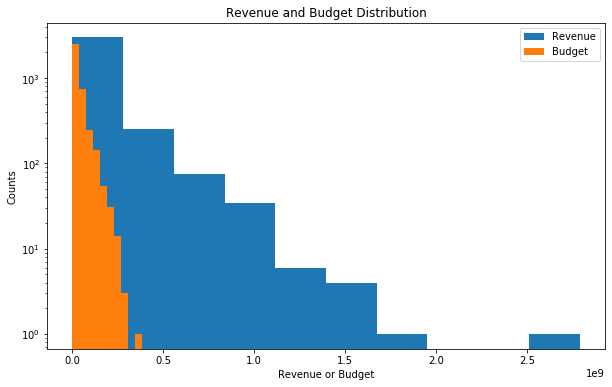

In [23]:
sort = df.sort_values('revenue', ascending=False )

plt.figure(figsize=(10,6))
plt.hist(df['revenue'], label = 'Revenue', log=True)
plt.hist(df['budget'], label = 'Budget', log=True)
plt.xlabel('Revenue or Budget')
plt.ylabel('Counts')
plt.title('Revenue and Budget Distribution')
plt.legend()

It is clear that the revenue and budget have very similar trends, as their graphs are nearly identical. This demonstrates how there is a clear correlation between movies' revenues and budgets, and how the majority of movies have low budgets and therefore produce low revenues.

To make the trend even more clear, we will create a scatterplot of revenue vs. budget.

Text(0.5, 1.0, 'Revenue vs. Budget')

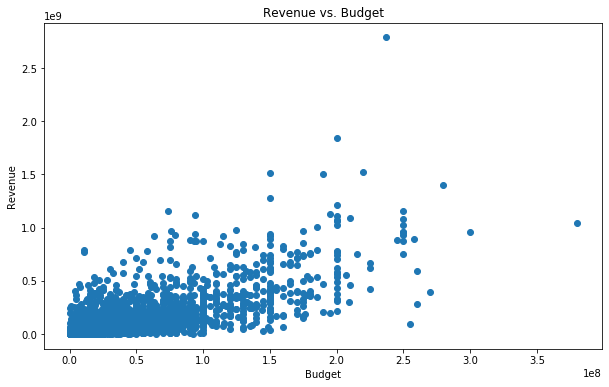

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs. Budget')

As shown in the scatterplot, there is a positive linear correlation between the revenue and budget. As the budget increases, the revenue increases as well. This shows how the budget plays a critical role in how much a movie ends up earning.

### 2.2.2: Vote Average/Revenue relationship

We will create a scatterplot between revenue and imdb vote average to see the relationship between these two variables.

Text(0.5, 1.0, 'Revenue vs. Vote Average')

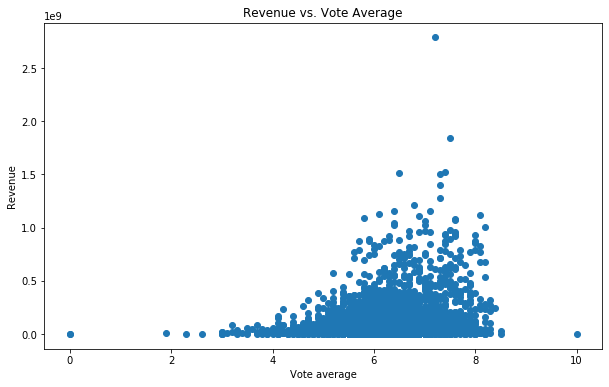

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Vote average')
plt.ylabel('Revenue')
plt.title('Revenue vs. Vote Average')

This scatterplot has unexpected results, because there doesn't seem to be a clear relationship between vote average and revenue. Even though it would seem like a movie would have a higher vote average if it has more revenue, it appears that the vote average is not completely related to how much it ends up making. It seems like the majority of vote averages hovers in the 6-8 range regardless of a movie's budget.

This information is good to know, because now we know that vote average does not play an important role in how much a movie makes.

### 2.2.3: Popularity/Revenue relationship

Text(0.5, 1.0, 'Revenue vs. Popularity')

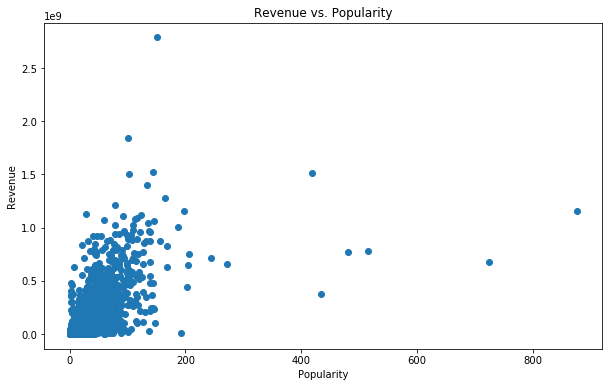

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df['popularity'], df['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Revenue vs. Popularity')

As shown in the scatterplot, there is a positive correlation between the revenue and popularity. In general, a higher popularity indicates a higher revenue, which demonstrates how a movie's popularity plays a role in how much it ends up earning.

### 2.2.4: Vote Count/Revenue relationship

Now, we will create a scatter plot between the imdb vote count (# of votes a movie has) and movie revenue

Text(0.5, 1.0, 'Revenue vs. Vote Count')

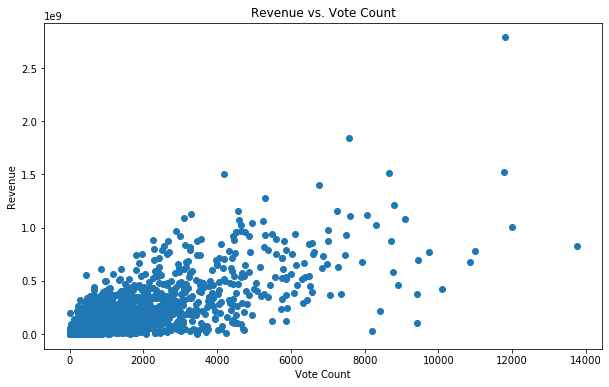

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(df['vote_count'], df['revenue'])
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.title('Revenue vs. Vote Count')

As shown in the scatterplot, there is a positive linear correlation between the revenue and vote count. As the vote count increases, the revenue increases as well. This shows how the vote count is one of the indicators of how much a movie ends up earning. 

### 2.2.5: Genre/Revenue relationship

We will create a bar chart for the average revenue vs. genre, to see if there is a correlation between a movie's genre and how much movie they make.

Before we create the chart, we have to find all of the unique genres in the data and then calculate the average revenue for each genre.

In [28]:
genre_revenue = {}
genre_count = {}

data = {'genre' : genres, 'revenue' : revenues}
data = pd.DataFrame(data)

#get the data
for index, row in data.iterrows():
    
    cur_genre = row["genre"]
    cur_revenue = row["revenue"]
    
    #if has seen the genre before
    if cur_genre in genre_revenue:
        genre_revenue[cur_genre] += cur_revenue
        genre_count[cur_genre] += 1
        
    #if haven't seen the genre before    
    else:
        genre_revenue[cur_genre] = cur_revenue
        genre_count[cur_genre] = 1
        
genre_avg_revenue = {}

#calculate the average revenue for each genre
for genre in genre_revenue.keys():
    genre_avg_revenue[genre] = genre_revenue[genre] / genre_count[genre]

Now that we've calculated the average revenue of movies for each genre, we can create the bar chart.

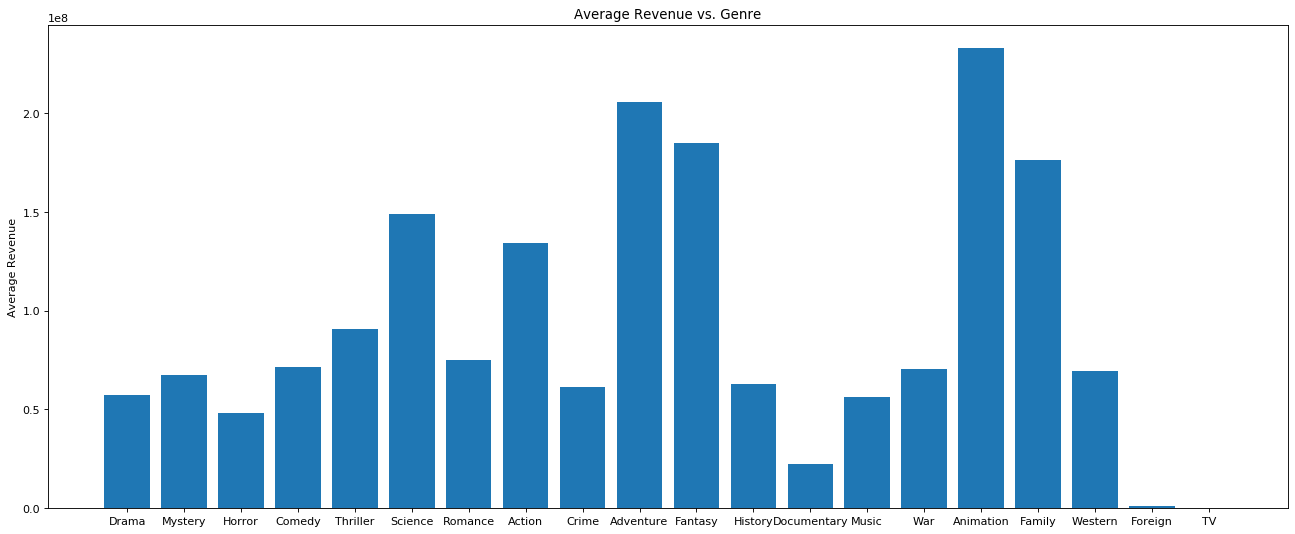

In [29]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')


objects = genre_avg_revenue.keys()
y_pos = np.arange(len(objects))
performance = genre_avg_revenue.values()

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs. Genre')

plt.show()

Some of the observations we can get from the graph are that animation, adventure, and fantasy are the genres that have the highest average revenue per movie. The genres that have the lowest average revenue per movie are TV, foreign, and documentary.

From this bar chart, it is clear that a movie's genre impacts how much revenue they end up earning, as shown by how certain genres earn much more than other genres.

### 2.2.6: Production Companies/Revenue relationship

First we will create a histogram of how many movies production companies make.

Text(0.5, 1.0, 'Movies Produced vs. Number of Production Companies')

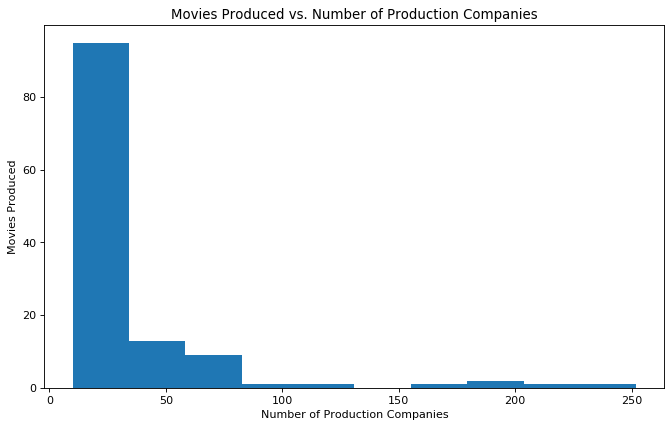

In [30]:
all_prod_comps = {}

#go through each row
for index, row in df.iterrows():
    
    prod_comps = row["production_companies"]
    
    #go through current production companies
    for p_c in prod_comps:
        
        #if has seen production company before
        if p_c["name"] in all_prod_comps:
            all_prod_comps[p_c["name"]] += 1
            
        #if hasn't seen production company before    
        else:
            all_prod_comps[p_c["name"]] = 1
        
all_prod_comps
reduced = dict( (key, value) for (key, value) in all_prod_comps.items() if value >= 10 )
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
n, bins, patches = plt.hist(reduced.values())

plt.xlabel('Number of Production Companies')
plt.ylabel('Movies Produced')
plt.title('Movies Produced vs. Number of Production Companies')

As shown in the graph, there are only a few production companies that produce many movies, while the majority of companies only produce a small number of movies. 

Now we will create a bar plot to find the relationship between average revenue and the number of movies a production company has produced.

Text(0.5, 1.0, 'Average Revenue vs. Number of Movies A Production Company Produced')

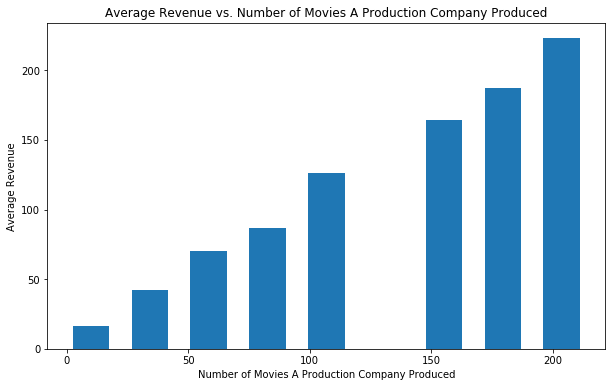

In [31]:
x = []
y = []

#go through each bin
for i in range(len(bins) - 1):
    
    start = bins[i]
    end = bins[i+1]
    x.append(start)
    reduced = list(value for (key, value) in all_prod_comps.items() if value >= start and value < end)
    y.append(np.mean(reduced))

plt.figure(figsize=(10,6))
plt.bar(x,y, width=15)

plt.xlabel('Number of Movies A Production Company Produced')
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs. Number of Movies A Production Company Produced')

From this graph, it is clear that if a movie is produced by a production company that has made many movies in the past, it will have a higher average revenue. This shows that a movie's production company/companies will impact its revenue.

Now lets analyze our data!

# 3: Analysis

In our analysis, we will create two regression models, linear regression and random forests regression, to make predictions for revenue. We will only be using budget, popularity, and vote count as the dependent variables, because our models won't be able to handle too many variables and those are some of the most critical variables as discovered in the exploratory section. We will use training data to train our models, and then use test data to predict values for revenue.

Afterwards, we will perform t-tests with 10-fold validation to compare the results from these two regression models, to observe which model has the least amount of error.

## 3.1: Training models

First we will create the linear regression model and predict values for revenue. For more information on sklearn's linear regression: [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [32]:
feature_list = ['budget', 'popularity', 'vote_count']
X = []
Y = []

dt = df.dropna()

#get the dependent and independent variables
for index, row in dt.iterrows():
    X.append([row["budget"], row["popularity"], row["vote_count"]])
    Y.append(row["revenue"])

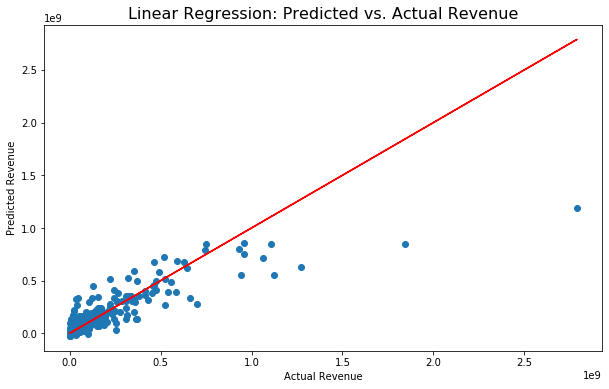

In [33]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

pred = lm.predict(X_test)

# Plot results. Red line to show actual data points
plt.figure(figsize=(10,6))
plt.title("Linear Regression: Predicted vs. Actual Revenue", fontsize=16)
plt.scatter(Y_test,pred)
plt.plot(Y_test, Y_test, color = "Red") 
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

As shown in the graph, the linear regression model predicts the revenue for the data relatively well, as it is able to obtain the same trend as the actual revenue.

## 3.2: Predictions using random forests

Now we will create the random forests model and predict values for revenue. For more information on sklearn's random forests regressor: [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

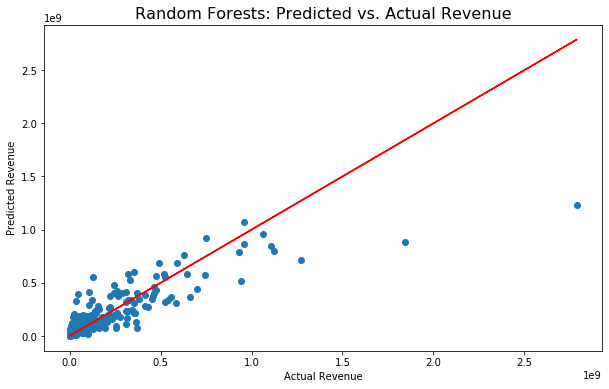

In [34]:
rfr = RandomForestRegressor(100)

model = rfr.fit(X_train, Y_train)

pred = rfr.predict(X_test)
# Plot performance
plt.figure(figsize=(10,6))
plt.title("Random Forests: Predicted vs. Actual Revenue", fontsize=16)
plt.scatter(Y_test,pred)
plt.plot(Y_test, Y_test, color = "Red") 
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

As shown in the graph, the random forests model also predicts the revenue for the data well, but it is already clear that its approximation isn't as accurate as the linear regression model's.

Now that we have our two models, we will perform a t-test with 10-fold validation to compare the results with each other.

## 3.3: Cross validation

In [35]:
classifiers = {'Linear Regression' : lm, 'Random Forests Regression' : rfr}

n = len(Y)
error = []
stderror = []
i = 0

#go through the regressioons
for name,regressor in classifiers.items():
    
    score = model_selection.cross_val_score(regressor, X, Y, cv=10, scoring='neg_mean_squared_error')
    error.append(-score)
    stderror.append(np.mean(error[i] / np.sqrt(n)))
    
    print("{} error: {}, MSE: {}\n".format(name, error[i], stderror[i]))
    i = i + 1
    
diff = error[1] - error[0]
diffBar = np.mean(diff)
sdDiff = np.sqrt(np.sum(np.square(diff - diffBar)) / 9)
seDiff = sdDiff / np.sqrt(n)
t = diffBar / seDiff
pval = stats.t.sf(t, 9)

print("Null Hypothesis: LR_Error = SVR_Error\nAlternative Hypothesis: LR_Error < SVR_Error")
print("\nMean Difference: {}, Test statistic t: {}, P-Val: {}".format(diffBar, t, pval))

Linear Regression error: [3.03513685e+16 1.08113419e+16 2.64399455e+16 2.93988898e+16
 1.65889926e+16 8.71718898e+15 1.41508496e+16 1.02422744e+16
 2.12365710e+16 2.32349252e+16], MSE: 547324838572740.4

Random Forests Regression error: [3.11764892e+16 1.17372938e+16 2.56773220e+16 2.87053943e+16
 1.43547962e+16 1.19881648e+16 1.70442116e+16 1.82092383e+16
 2.05207138e+16 2.36378369e+16], MSE: 581334641698730.8

Null Hypothesis: LR_Error = SVR_Error
Alternative Hypothesis: LR_Error < SVR_Error

Mean Difference: 1187911353837365.2, Test statistic t: 14.213134546799033, P-Val: 8.998453845821593e-08


As shown in the results, the linear regression model performed better than the random forests model, as expected. The linear regression model's predicted revenue had less error compared to the random forests one, and from this we can conclude that the linear regression model is a more reliable predicting model for revenue. 

# 4: Conclusions

From our analysis, it is clear that budget, popularity, and vote count are factors that influence how much a movie earns in terms of revenue. Even though we only used a few dependent variables, there are many more variables that also affect a movie's revenue that we didn't take into account in our models. This includes the other variables that we analyzed in our exploratory section, as well as other categorial attributes such as what a movie's plot is. Even though we weren't able to take all of the possible variables into account, from our analysis we have still gained a better understanding of how movies' revenues work.

As for missing data in our data set, because we chose to remove any rows with no values for budget and revenue, the missing data is missing not at random (MNAR). In other projects and in the future, we can instead use imputations to replace the missing data, rather than just removing them altogether. This could possible lead to getting more accurate results and having the models predict revenue more accurately.

Through this project, we hope to have created a better understanding of how movies' earnings work and highlight the multiple factors that go into play in determining a movie's revenue.

Our work only provides a small glimpse into the complexity of how the movie industry works, and we hope that our study was an informative and interesting read!